# 6.4 part 3
### ***Number_of_ingredients (X), Cocoa percent (y)***
   

# Contents
    1. Import libraries and data
    2. Data check
    3. Hypothesis
    4. Data prep for regression analysis 
    5. Regression analysis
    6. Summary
   

# 1. Import Libraries and data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# creating path for import
path = r'/Users/bdigregorio/Desktop/CareerFoundry/Data Immersion/Data Immersion 6/Flavors of Cacao Analysis'


In [4]:
# importing 'df_fc3_B'

df_fc3_B = pd.read_excel(os.path.join(path, '02 Data', 'Prepared Data', 'df_fc3_B.xlsx'))


# 2. Data check
### This is the same df as part 1 and 2 where cleaning and consistency were completed.


In [5]:
df_fc3_B.head()

,Unnamed: 0,Company (Manufacturer),Company Location,Review Date,Country of Bean Origin,Specific Bean Origin or Bar Name,Cocoa Percent,Cocoa Level,Number_of_Ingredients,Ingredient Level,Rating,Rating Level,Ingredients_abbr,Most Memorable Characteristics
0,0,Manoa,U.S.A.,2012,Liberia,"Liberia, batch 174",0.72,Mid percent,3,3,3.25,Mid-level,"B,S,C","molassses, intense, off, herb"
1,1,Manoa,U.S.A.,2012,U.S.A.,"Hawai'i Island, Hamakua, Hawaiian Crown, b. 176",0.72,Mid percent,3,3,2.75,Mid-level,"B,S,C","oily, tangy, fruit, earthy"
2,2,Manoa,U.S.A.,2012,Peru,"Piura, batch 173",0.72,Mid percent,3,3,3.00,Mid-level,"B,S,C","banana, menthol, medicinal"
3,3,Manoa,U.S.A.,2012,U.S.A.,"O'ahu Island, Winward,Maunawili district, b. 151",0.72,Mid percent,3,3,3.25,Mid-level,"B,S,C","molasses, sweet, cocoa"
4,4,Nanea,U.S.A.,2013,U.S.A.,Criollo Blend,0.85,High percent,3,3,3.50,Mid-level,NaN,"sandy, spicy, earthy"


### Extreme values check

/var/folders/sy/t8rtd3yx6xg83r29mvqjg7cm0000gp/T/ipykernel_99881/3775792285.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_fc3_B['Cocoa Percent'], bins=25)


<Axes: xlabel='Cocoa Percent', ylabel='Density'>

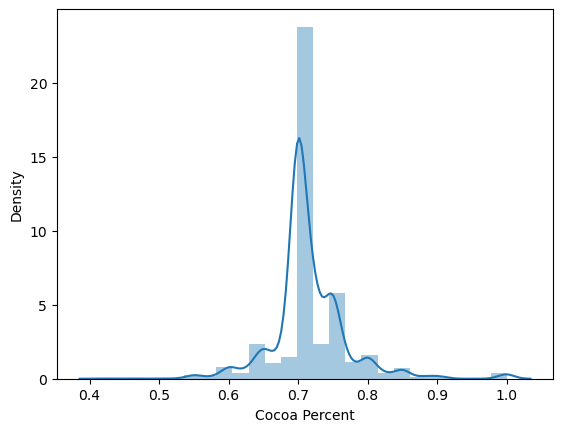

In [6]:
sns.distplot(df_fc3_B['Cocoa Percent'], bins=25)

### Most chocolate bars are made with three ingredients

In [7]:
# Creating how to see  mode values of 'Cocoa Percent'
# Custom function to calculate the mode
def mode(group):
    return group.mode().iloc[0]  

In [8]:
# summary stats
df_fc3_B['Cocoa Percent'].agg(['mean','min', 'median', 'max',mode])


mean      0.716131
min       0.420000
median    0.700000
max       1.000000
mode      0.700000
Name: Cocoa Percent, dtype: float64

# 3. HYPOTHESIS

## An earlier hypothesis will be looked into now. It is:
## Chocolate bars with the highest rating have a mid-level amount of cocoa.
***(1= "Completely Cocoa"), (>=0.75 and <1: "High percent"), (>= 0.6 and < 0.75: "Mid percent), ("<0.6: "Low percent")***

# 4. Data prep for regression analysis 

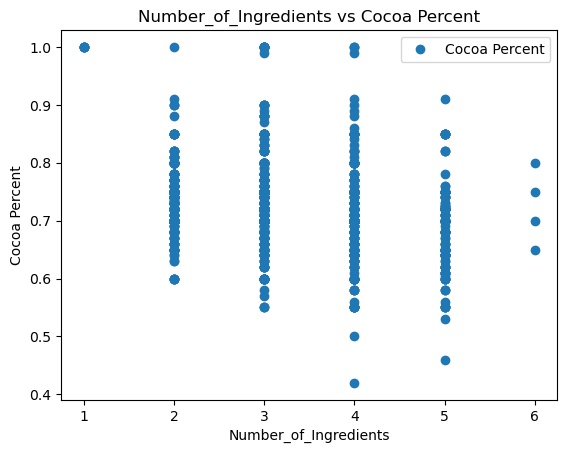

In [9]:
# Create a scatterplot using matplotlib for another look at how the chosen variables plot against each other.
# Trying to understand how the cocoa level (independent variable) relates to the rating (dependent variable)
df_fc3_B.plot(x = 'Number_of_Ingredients', y='Cocoa Percent',style='o') 
plt.title('Number_of_Ingredients vs Cocoa Percent')  
plt.xlabel('Number_of_Ingredients')  
plt.ylabel('Cocoa Percent')
plt.show()

In [10]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_fc3_B['Number_of_Ingredients'].values.reshape(-1,1)
y = df_fc3_B['Cocoa Percent'].values.reshape(-1,1)

In [11]:
X

array([[3],
       [3],
       [3],
       ...,
       [2],
       [2],
       [2]])

In [12]:
y

array([[0.72],
       [0.72],
       [0.72],
       ...,
       [0.73],
       [0.7 ],
       [0.7 ]])

In [13]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 5. Regression analysis

In [14]:
# Creating a regression object.
# This is the regression object, which will be fit onto the training set.

regression = LinearRegression()  

In [15]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [16]:
# Predicting the values of y using X.

y_predicted = regression.predict(X_test)

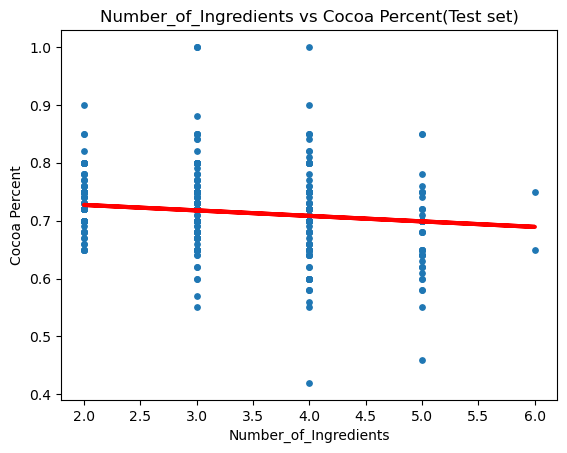

In [17]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Number_of_Ingredients vs Cocoa Percent(Test set)')
plot_test.xlabel('Number_of_Ingredients')
plot_test.ylabel('Cocoa Percent')
plot_test.show()

In [18]:
# Creating objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score.

In [19]:
# Print the model summary statistics. 
# Evaluating the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00948528]]
Mean squared error:  0.00270190139766502
R2 score:  0.02364299473746989


### Negative slope indicates a negative relationship: as "Number_of_Ingredients" (X) rises, "Cocoa Percent" (y) falls.                                                                                              
### MSE: not a large number. Prediction may be close to the actual results but R2 score is very small (close to zero!):  may not be a very good model fit.

In [20]:
y_predicted

array([[0.71755296],
       [0.70806768],
       [0.71755296],
       [0.71755296],
       [0.71755296],
       [0.71755296],
       [0.71755296],
       [0.72703824],
       [0.71755296],
       [0.70806768],
       [0.71755296],
       [0.69858241],
       [0.72703824],
       [0.72703824],
       [0.71755296],
       [0.72703824],
       [0.70806768],
       [0.72703824],
       [0.71755296],
       [0.70806768],
       [0.71755296],
       [0.69858241],
       [0.71755296],
       [0.72703824],
       [0.72703824],
       [0.69858241],
       [0.70806768],
       [0.71755296],
       [0.71755296],
       [0.70806768],
       [0.70806768],
       [0.71755296],
       [0.71755296],
       [0.70806768],
       [0.71755296],
       [0.71755296],
       [0.71755296],
       [0.71755296],
       [0.71755296],
       [0.71755296],
       [0.72703824],
       [0.71755296],
       [0.71755296],
       [0.71755296],
       [0.71755296],
       [0.72703824],
       [0.70806768],
       [0.708

In [21]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(25)

,Actual,Predicted
0,0.72,0.717553
1,0.60,0.708068
2,0.70,0.717553
3,0.72,0.717553
4,0.75,0.717553
5,0.75,0.717553
6,0.70,0.717553
7,0.70,0.727038
8,0.70,0.717553
9,0.65,0.708068


### Upon visual inspection, these predictions look pretty close. Many are in the 0.01 to 0.03 range although some get as high as 0.05 to 0.0.8

In [22]:
# finding how many predictions were off by a determined threshold amount.
# I chose 0.03 because that seems to be a re-occurring difference above.

# Define a threshold for correctness 
threshold = 0.03

# Calculate the absolute discrepancy between Actual and Predicted
data['Discrepancy'] = abs(data['Actual'] - data['Predicted'])

# Count the number of predictions that are not correct by the defined threshold
incorrect_predictions = data[data['Discrepancy'] > threshold]
num_incorrect_predictions = len(incorrect_predictions)

print(f"Number of predictions not correct by more than {threshold}: {num_incorrect_predictions}")

Number of predictions not correct by more than 0.03: 283


In [23]:
df_fc3_B.shape

(2657, 14)

### A little more than 10% of the preditions for the dataset are incorrect by more than 0.03. 90% close to accuracy can be considered a pretty good margin. Perhaps this model is acceptable.

### Comparing how the regression fits the training set

In [24]:
# Predicting the X_train

y_predicted_train = regression.predict(X_train)

In [25]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [26]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-0.00948528]]
Mean squared error:  0.0031108202815856
R2 score:  0.022748879064122263


### Slope has not changed.
### MSE went up a bit from 0.0027 to 0.00311
### R2 score decreased from 0.0236 to 0.0227, not much change. The training set actually performed better than the test set but R2 score still being much closer to zero than one indicates it actually may not be a good fit.

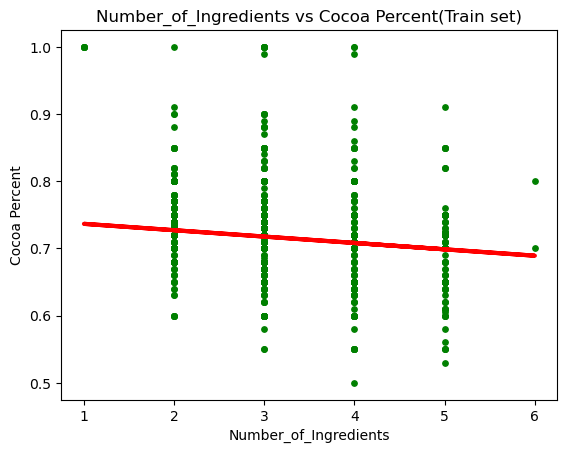

In [27]:
# scatterplot the training set.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Number_of_Ingredients vs Cocoa Percent(Train set)')
plot_test.xlabel('Number_of_Ingredients')
plot_test.ylabel('Cocoa Percent')
plot_test.show()

In [28]:
data = pd.DataFrame({'Actual': y_train.flatten(), 'Predicted': y_predicted_train.flatten()})
data.head(25)

,Actual,Predicted
0,0.70,0.698582
1,0.80,0.727038
2,0.72,0.717553
3,0.70,0.717553
4,0.70,0.727038
5,0.67,0.717553
6,0.72,0.717553
7,0.70,0.717553
8,0.70,0.727038
9,0.71,0.708068


### These predictions look closer to the actual values than expected!


# 6. Summary

### As in part 1, we  have to consider the bias for any project. As stated earlier, the rating of chocolate bars is a subjective tasting. 
### Previous analyses have shown most favorably tasting bars (high ratings) have mid-level number of ingredients. The charts mostly show us as more ingredients go into the chocolate bars the cocoa percent goes down.The above model may be a  good predictor of cocoa percent in regard to the number of ingredients after all.